# 1. Prepare Problem

#### There are many types of pistachio, considering that each species has unique properties, recognizing and isolating pistachios is a highly practical technique. Some pistachios, for example, are better suited for baking, and others, which are more crunchy, are generally consumed as snacks. 

## a) Load libraries

In [6]:
#Manipulate and visualize the data
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

#Data Pipline
from sklearn.pipeline import Pipeline

#Data Transform
from sklearn.preprocessing import MinMaxScaler

#Feature Selection
from sklearn.feature_selection import SequentialFeatureSelector

#Model Selection
from sklearn.model_selection import train_test_split,GridSearchCV

#ML models
from sklearn.linear_model import LogisticRegression,SGDRegressor
from sklearn import tree

#Evaluation metrics
from sklearn.metrics import accuracy_score,classification_report

## b) Load dataset

https://www.kaggle.com/datasets/amirhosseinmirzaie/pistachio-types-detection

In [7]:
df=pd.read_csv('pistachio.csv')
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,Kirmizi_Pistachio
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,Siit_Pistachio
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,Kirmizi_Pistachio
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,Kirmizi_Pistachio
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,Kirmizi_Pistachio


In [8]:
row, col = df.shape
print('The dataset has',row,'rows and',col,'columns')

The dataset has 1718 rows and 17 columns


# 2. Summarize Data

##  a) Descriptive statistics

In [9]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000
mean,79871.952852,1421.797588,446.206444,238.193128,0.840347,317.790000,0.940103,84947.671129,0.716055,1.899342,0.570831,0.712841,0.005704,0.003017,0.510097,0.955185
std,12968.217051,373.408835,31.885328,30.426445,0.049026,26.571699,0.050006,13081.742551,0.052534,0.241253,0.211514,0.044230,0.000810,0.000334,0.063391,0.051735
min,29808.000000,858.363000,321.425500,133.509600,0.504900,194.814600,0.588000,37935.000000,0.427200,1.158500,0.062800,0.476000,0.004000,0.002400,0.226600,0.620400
25%,71898.500000,1169.633225,426.554100,217.875475,0.817500,302.562375,0.920250,76357.750000,0.688100,1.736325,0.372325,0.682000,0.005200,0.002800,0.465125,0.944200
50%,79795.000000,1260.785500,448.453150,235.888750,0.850250,318.744650,0.953800,84973.000000,0.726100,1.899550,0.643850,0.709750,0.005600,0.003000,0.503750,0.972800
75%,88980.000000,1599.479000,467.515200,257.433625,0.875375,336.590000,0.976300,93660.750000,0.753600,2.068575,0.744450,0.741600,0.006100,0.003200,0.549975,0.986800
max,124008.000000,2755.049100,535.642200,383.046100,0.946000,397.356100,0.995100,132478.000000,0.820400,3.085800,0.933600,0.869500,0.013100,0.005300,0.756100,0.999000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           1718 non-null   int64  
 1   PERIMETER      1718 non-null   float64
 2   MAJOR_AXIS     1718 non-null   float64
 3   MINOR_AXIS     1718 non-null   float64
 4   ECCENTRICITY   1718 non-null   float64
 5   EQDIASQ        1718 non-null   float64
 6   SOLIDITY       1718 non-null   float64
 7   CONVEX_AREA    1718 non-null   int64  
 8   EXTENT         1718 non-null   float64
 9   ASPECT_RATIO   1718 non-null   float64
 10  ROUNDNESS      1718 non-null   float64
 11  COMPACTNESS    1718 non-null   float64
 12  SHAPEFACTOR_1  1718 non-null   float64
 13  SHAPEFACTOR_2  1718 non-null   float64
 14  SHAPEFACTOR_3  1718 non-null   float64
 15  SHAPEFACTOR_4  1718 non-null   float64
 16  Class          1718 non-null   object 
dtypes: float64(14), int64(2), object(1)
memory usage: 22

In [11]:
# Check the Count of all pistachio classes
print(df['Class'].value_counts())

Kirmizi_Pistachio    998
Siit_Pistachio       720
Name: Class, dtype: int64


## b) Data visualizations

<AxesSubplot:xlabel='Class', ylabel='count'>

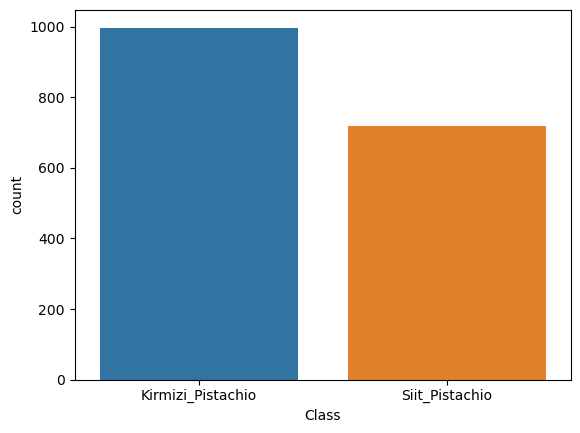

In [12]:
sns.countplot(x='Class', data=df)

<AxesSubplot:>

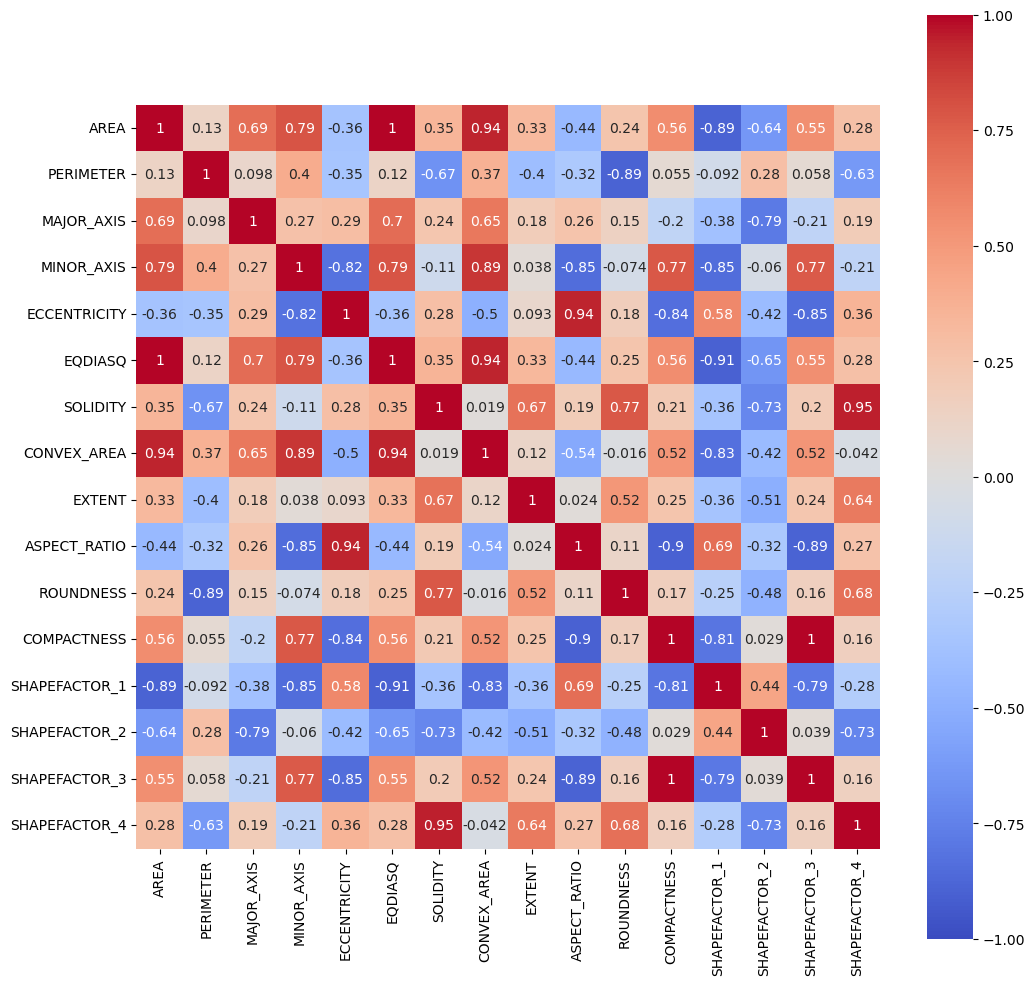

In [13]:
##shows the pearson correlation between the features
plt.figure(figsize=(12,12))
sns.heatmap(df.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

# 3. Prepare Data

## a) Data Cleaning

In [14]:
#check the null values 
df.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
Class            0
dtype: int64

## b) Feature Selection

In [15]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [18]:
def feature_selection(model, n_features):
  '''
  function that return the best 5 features
  '''
  sfs = SequentialFeatureSelector(model, n_features_to_select= n_features, direction = 'forward')
  sfs.fit(X_train, y_train)
  X_train_reduced = sfs.transform(X_train)
  X_test_reduced = sfs.transform(X_test)
  return X_train_reduced, X_test_reduced

In [3]:
def best_param(model, parameter):
  grid_search=GridSearchCV(model,parameter,scoring='accuracy',cv=10, n_jobs= -1)
  grid_search.fit(X_train,y_train)
  #return the best parameter
  return grid_search.best_params_

# Logistic Regression Pipline

## Intialize the pipline

In [21]:
LR_pipline=Pipeline([
    ("scaler", MinMaxScaler()), #transformer
    ("model", LogisticRegression()) #estimator
])

## Train the model

In [22]:
LR_pipline.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LogisticRegression())])

## prediction

In [23]:
#predict testing data
LR_y_pred = LR_pipline.predict(X_test)

## Model Evaluation

In [24]:
LR_accuracy=accuracy_score(y_test,LR_y_pred)
LR_accuracy

0.8953488372093024

In [25]:
target=['Kirmizi_Pistachio', 'Siit_Pistachio']
LR_CR=classification_report(y_test,LR_y_pred,target_names=target)
print(LR_CR)

                   precision    recall  f1-score   support

Kirmizi_Pistachio       0.92      0.91      0.91       312
   Siit_Pistachio       0.86      0.87      0.87       204

         accuracy                           0.90       516
        macro avg       0.89      0.89      0.89       516
     weighted avg       0.90      0.90      0.90       516



# Decision Trees Pipline

## Intialize the pipline

In [26]:
DT_pipline=Pipeline([
    ("scaler", MinMaxScaler()), #transformer
    ("model", tree.DecisionTreeClassifier()) #estimator
])

## Train the model

In [27]:
DT_pipline.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', DecisionTreeClassifier())])

## prediction

In [28]:
DT_y_pred=DT_pipline.predict(X_test)

## Model Evaluation

In [29]:
#calculate the accuaracy
DT_accuracy=accuracy_score(y_test,DT_y_pred)
DT_accuracy

0.8255813953488372

In [30]:
#Classification report
target=['Kirmizi_Pistachio', 'Siit_Pistachio']
DT_CR=classification_report(y_test,DT_y_pred,target_names=target)
print(DT_CR)

                   precision    recall  f1-score   support

Kirmizi_Pistachio       0.85      0.86      0.86       312
   Siit_Pistachio       0.79      0.77      0.78       204

         accuracy                           0.83       516
        macro avg       0.82      0.82      0.82       516
     weighted avg       0.83      0.83      0.83       516



## Visualize the Tree

In [32]:
plt.figure(figsize=(100,100))
feature_names=['AREA','PERIMETER',	'MAJOR_AXIS',	'MINOR_AXIS',	'ECCENTRICITY',	'EQDIASQ',	'SOLIDITY',	'CONVEX_AREA',
               	'EXTENT',	'ASPECT_RATIO',	'ROUNDNESS','COMPACTNESS',	'SHAPEFACTOR_1',	'SHAPEFACTOR_2',	'SHAPEFACTOR_3',	'SHAPEFACTOR_4']
tree.plot_tree(DT_pipline.named_steps['model'],feature_names=feature_names,class_names=target,filled=True,rounded=True)
plt.show()